# Railspace Text + Patch Data Exploration

This notebook provides some examples of how to load and visualise the text outputs of MapReader. 

We focus on the geography of railspace and labels describing railspace on maps.

----

In [1]:
import pandas as pd
import geopandas as gpd
import plotly.express as px
from collections import Counter
from tqdm import tqdm
from shapely import from_wkt, to_wkt

# 1. Load data

In [2]:
# 1.1 Load the patch predictions for railspace model

predictions = pd.read_csv("../post_processed_railspace_predictions_patch_df.csv", index_col=0)
predictions["geometry"] = predictions["geometry"].apply(from_wkt) # convert the geometry column to shapely objects
predictions = gpd.GeoDataFrame(predictions, geometry="geometry", crs="EPSG:4326")

predictions.head(3)

,parent_id,image_path,shape,pixel_bounds,coordinates,crs,geometry,predicted_label,pred,conf,min_x,min_y,max_x,max_y,new_predicted_label,new_pred
image_id,,,,,,,,,,,,,,,,
patch-0-0-134-134-#map_95470395.png#.png,map_95470395.png,/bask/projects/v/vjgo8416-dataculture/mapreade...,"(134, 134, 4)","(0, 0, 134, 134)","(-0.230712890625, 51.49416936411413, -0.229275...",EPSG:4326,"POLYGON ((-0.22928 51.49417, -0.22928 51.49506...",no,0,0.962000,0,0,134,134,no,0.0
patch-0-134-134-268-#map_95470395.png#.png,map_95470395.png,/bask/projects/v/vjgo8416-dataculture/mapreade...,"(134, 134, 4)","(0, 134, 134, 268)","(-0.230712890625, 51.49327399808456, -0.229275...",EPSG:4326,"POLYGON ((-0.22928 51.49327, -0.22928 51.49417...",railspace,1,0.999944,0,134,134,268,railspace,1.0
patch-0-268-134-402-#map_95470395.png#.png,map_95470395.png,/bask/projects/v/vjgo8416-dataculture/mapreade...,"(134, 134, 4)","(0, 268, 134, 402)","(-0.230712890625, 51.492378632055, -0.22927522...",EPSG:4326,"POLYGON ((-0.22928 51.49238, -0.22928 51.49327...",no,0,0.999654,0,268,134,402,no,0.0


In [3]:
## Load the patch stats for the 100m patches

patch_df = pd.read_csv("../100meter_patch_df.csv", index_col=0)
patch_df.head()

,parent_id,image_path,shape,pixel_bounds,coordinates,crs,geometry,mean_pixel,mean_pixel_R,mean_pixel_G,mean_pixel_B,mean_pixel_A,std_pixel,std_pixel_R,std_pixel_G,std_pixel_B,std_pixel_A
image_id,,,,,,,,,,,,,,,,,
patch-0-0-134-134-#map_95470395.png#.png,map_95470395.png,/bask/projects/v/vjgo8416-dataculture/mapreade...,"(134, 134, 4)","(0, 0, 134, 134)","(-0.230712890625, 51.49416936411413, -0.229275...",EPSG:4326,POLYGON ((-0.2292752265930176 51.4941693641141...,0.783453,0.729448,0.724836,0.679528,1.0,0.177837,0.241924,0.240780,0.228645,0.0
patch-0-134-134-268-#map_95470395.png#.png,map_95470395.png,/bask/projects/v/vjgo8416-dataculture/mapreade...,"(134, 134, 4)","(0, 134, 134, 268)","(-0.230712890625, 51.49327399808456, -0.229275...",EPSG:4326,POLYGON ((-0.2292752265930176 51.4932739980845...,0.767837,0.707346,0.705179,0.658822,1.0,0.139691,0.189260,0.188089,0.181415,0.0
patch-0-268-134-402-#map_95470395.png#.png,map_95470395.png,/bask/projects/v/vjgo8416-dataculture/mapreade...,"(134, 134, 4)","(0, 268, 134, 402)","(-0.230712890625, 51.492378632055, -0.22927522...",EPSG:4326,"POLYGON ((-0.2292752265930176 51.492378632055,...",0.783654,0.729539,0.727180,0.677897,1.0,0.139936,0.190090,0.188499,0.181156,0.0
patch-0-402-134-536-#map_95470395.png#.png,map_95470395.png,/bask/projects/v/vjgo8416-dataculture/mapreade...,"(134, 134, 4)","(0, 402, 134, 536)","(-0.230712890625, 51.49148326602543, -0.229275...",EPSG:4326,POLYGON ((-0.2292752265930176 51.4914832660254...,0.818651,0.778711,0.774625,0.721267,1.0,0.129195,0.176301,0.174155,0.166325,0.0
patch-0-536-134-670-#map_95470395.png#.png,map_95470395.png,/bask/projects/v/vjgo8416-dataculture/mapreade...,"(134, 134, 4)","(0, 536, 134, 670)","(-0.230712890625, 51.49058789999587, -0.229275...",EPSG:4326,POLYGON ((-0.2292752265930176 51.4905878999958...,0.794962,0.745092,0.742249,0.692508,1.0,0.137823,0.187255,0.185817,0.178218,0.0


In [4]:
# Join the patch_df to the predictions, adding pixel stats

predictions = predictions.join(patch_df[['mean_pixel', 'mean_pixel_R', 'mean_pixel_G', 'mean_pixel_B', 'mean_pixel_A', 'std_pixel', 'std_pixel_R', 'std_pixel_G', 'std_pixel_B', 'std_pixel_A']]) 

In [5]:
# filter for only railspace predictions
predictions = predictions[predictions["new_predicted_label"]=="railspace"]

In [6]:
# 1.2 load the geojson with spotted text

# we use the file that has been converted to point data
spotted_text = gpd.read_file("../geo_predictions_deduplicated_point.json")
spotted_text.to_crs(epsg=27700, inplace=True)
spotted_text.shape


(463769, 7)

In [7]:
#1.3 view spotted_text df

spotted_text.head(3)

,image_id,crs,text,score,patch_id,duplicate,geometry
0,map_95470395.png,EPSG:4326,GARDENS,0.97,patch-0-0-1000-1000-#map_95470395.png#.png,False,POINT (523626.732 178792.734)
1,map_95470395.png,EPSG:4326,Soh.,0.96,patch-0-0-1000-1000-#map_95470395.png#.png,False,POINT (523628.406 178550.555)
2,map_95470395.png,EPSG:4326,ROAD,0.98,patch-0-0-1000-1000-#map_95470395.png#.png,False,POINT (523372.540 178126.047)


In [8]:
spotted_text["score"].astype(float).mean() # mean confidence score for spotted text

0.8532585187884485

In [9]:
#1.4 clean spotted_text 

spotted_text['text_cleaned'] = spotted_text['text'].apply(lambda x: x.lower().strip().replace("(", "").replace(")", ""))

## 2. Filter labels

Here we discard the following labels
- those starting and ending with #
- those starting < or ending with >
- numbers after stripping the dot

The we lowercase all labels.

In [10]:
# 2.1 filter spotted to reduce noise labels

def filter_labels(w):
	return (w.endswith('#') or w.startswith('#') or w.endswith('>') or w.startswith('<') or w.strip('.').isdigit())

spotted_text_filtered = spotted_text[~spotted_text.apply(lambda x: filter_labels(x['text_cleaned']), axis=1)]

In [11]:
# 2.2 remove duplicates

spotted_text_filtered = spotted_text_filtered.drop_duplicates(subset=['patch_id','geometry','text']).reset_index(drop=True)
spotted_text_filtered.shape

(210429, 8)

In [12]:
# 2.3 print the shape of the dataframes

print(f"Railspace predictions shape: {predictions.shape}")
print(f"Spotted text original shape: {spotted_text.shape} filtered {spotted_text_filtered.shape}")

Railspace predictions shape: (29395, 26)
Spotted text original shape: (463769, 8) filtered (210429, 8)


In [13]:
# 2.4 count text_cleaned values

spotted_text_filtered.text_cleaned.value_counts().head(10)

text_cleaned
b.      18026
m.      14030
f.       9671
p.       9335
road     8580
p        7805
s.       3226
farm     2573
b        2385
w        2271
Name: count, dtype: int64

In [14]:
spotted_text_filtered["score"].astype(float).mean() # mean confidence score for spotted text after filtering

0.8618543546754487

## 3. Filter patches

In [15]:
# 3.1 Retain patch predictions for maps that are in the spotted text data

text_map_ids = list(spotted_text.image_id.unique())
print('number of maps', len(text_map_ids))

# filter to those maps for which we have spotted text
predictions_red = predictions[predictions['parent_id'].isin(text_map_ids)]
predictions_red.shape,predictions.shape


number of maps 329


((29395, 26), (29395, 26))

In [16]:
# 3.4 convert the projection to the same as the spotted text

predictions_red.to_crs(epsg=27700, inplace=True) # 27700, British National Grid


In [17]:
predictions_red.reset_index(inplace=True) # convert image_id index to column

In [18]:
# 3.2 add geometry to the patch predictions

predictions_red["polygon"] = predictions_red["geometry"]
predictions_red["centroid"] = predictions_red["geometry"].centroid

predictions_red.reset_index(drop=True, inplace=True) # reset index

In [19]:
# 3.3 View predictions_red

predictions_red.head()

,image_id,parent_id,image_path,shape,pixel_bounds,coordinates,crs,geometry,predicted_label,pred,...,mean_pixel_G,mean_pixel_B,mean_pixel_A,std_pixel,std_pixel_R,std_pixel_G,std_pixel_B,std_pixel_A,polygon,centroid
0,patch-0-134-134-268-#map_95470395.png#.png,map_95470395.png,/bask/projects/v/vjgo8416-dataculture/mapreade...,"(134, 134, 4)","(0, 134, 134, 268)","(-0.230712890625, 51.49327399808456, -0.229275...",EPSG:4326,"POLYGON ((523024.806 178633.966, 523022.398 17...",railspace,1,...,0.705179,0.658822,1.0,0.139691,0.189260,0.188089,0.181415,0.0,"POLYGON ((523024.806 178633.966, 523022.398 17...",POINT (522973.703 178682.544)
1,patch-0-4422-134-4556-#map_95470395.png#.png,map_95470395.png,/bask/projects/v/vjgo8416-dataculture/mapreade...,"(134, 134, 4)","(0, 4422, 134, 4556)","(-0.230712890625, 51.46462228513854, -0.229275...",EPSG:4326,"POLYGON ((523101.859 175447.771, 523099.452 17...",railspace,1,...,0.729916,0.686203,1.0,0.167145,0.226341,0.225251,0.216987,0.0,"POLYGON ((523101.859 175447.771, 523099.452 17...",POINT (523050.725 175496.348)
2,patch-0-4556-134-4608-#map_95470395.png#.png,map_95470395.png,/bask/projects/v/vjgo8416-dataculture/mapreade...,"(134, 134, 4)","(0, 4556, 134, 4608)","(-0.230712890625, 51.46427482966438, -0.229275...",EPSG:4326,"POLYGON ((523102.793 175409.133, 523101.859 17...",railspace,1,...,0.747641,0.701713,1.0,0.166074,0.225587,0.223942,0.214769,0.0,"POLYGON ((523102.793 175409.133, 523101.859 17...",POINT (523052.395 175427.245)
3,patch-134-134-268-268-#map_95470395.png#.png,map_95470395.png,/bask/projects/v/vjgo8416-dataculture/mapreade...,"(134, 134, 4)","(134, 134, 268, 268)","(-0.22927522659301758, 51.49327399808456, -0.2...",EPSG:4326,"POLYGON ((523124.605 178636.381, 523122.195 17...",railspace,1,...,0.717194,0.667950,1.0,0.144296,0.195693,0.194597,0.186894,0.0,"POLYGON ((523124.605 178636.381, 523122.195 17...",POINT (523073.501 178684.958)
4,patch-134-4556-268-4608-#map_95470395.png#.png,map_95470395.png,/bask/projects/v/vjgo8416-dataculture/mapreade...,"(134, 134, 4)","(134, 4556, 268, 4608)","(-0.22927522659301758, 51.46427482966438, -0.2...",EPSG:4326,"POLYGON ((523202.656 175411.548, 523201.721 17...",railspace,1,...,0.641761,0.603449,1.0,0.177653,0.240743,0.239621,0.230249,0.0,"POLYGON ((523202.656 175411.548, 523201.721 17...",POINT (523152.257 175429.660)


In [20]:
# 3.5 Check

spotted_text[spotted_text.intersects(predictions_red.iloc[101].geometry)]

,image_id,crs,text,score,patch_id,duplicate,geometry,text_cleaned
510,map_95470395.png,EPSG:4326,EARL'S,0.94,patch-3200-0-4200-1000-#map_95470395.png#.png,False,POINT (525579.553 178604.370),earl's
513,map_95470395.png,EPSG:4326,HOGARTH,0.98,patch-3200-0-4200-1000-#map_95470395.png#.png,False,POINT (525585.731 178689.382),hogarth
1600,map_95470395.png,EPSG:4326,EARL'S,0.94,patch-3200-0-4200-1000-#map_95470395.png#.png,False,POINT (525579.553 178604.370),earl's
1603,map_95470395.png,EPSG:4326,HOGARTH,0.98,patch-3200-0-4200-1000-#map_95470395.png#.png,False,POINT (525585.731 178689.382),hogarth
403661,map_101436340.png,EPSG:4326,COURT,0.96,patch-1600-0-2600-1000-#map_101436340.png#.png,False,POINT (525616.429 178637.742),court
405083,map_101436340.png,EPSG:4326,COURT,0.96,patch-1600-0-2600-1000-#map_101436340.png#.png,False,POINT (525616.429 178637.742),court
405093,map_101436340.png,EPSG:4326,EARL'S,0.94,patch-1600-0-2600-1000-#map_101436340.png#.png,False,POINT (525579.578 178604.276),earl's
405097,map_101436340.png,EPSG:4326,HOGARTH,0.98,patch-1600-0-2600-1000-#map_101436340.png#.png,False,POINT (525585.886 178689.506),hogarth


In [21]:
# 3.6 Import map tiles from NLS tileserver

import xyzservices as xyz
tiles = xyz.TileProvider(
    name="OS 2nd Edition - 6 inch",
    url="https://api.maptiler.com/tiles/uk-osgb1888/{z}/{x}/{y}?key=5f6FYax2HhTa0Z9RfXsp",
    attribution="NLS",
)

To get a sense of what some of the abbreviations mean, please go to the NLS website: https://maps.nls.uk/os/abbrev/

# 10. Clustering experiments

In [23]:
from sklearn.cluster import KMeans
import json
import numpy as np
from shapely import Polygon
from sentence_transformers import SentenceTransformer

## 10a Clustering with just patch text

### SKIP IF ALREADY RUN

In [21]:
# 10.1 Create 'sentences' of railspace labels in patches

# important this cell takes a while to run
# you can simply ignore and load the json file I've shared with you
tqdm.pandas()
near_text = [] # here we store labels close to the target category, i.e. railspace

for i,row in tqdm(predictions_red.iterrows(), total=predictions_red.shape[0]):
	# get text intersecting the patch
	# get the set of text labels
	labels_patch = list(set(spotted_text_filtered[spotted_text_filtered.intersects(row.geometry)].text_cleaned.tolist()))
	# sort
	labels_patch = sorted(labels_patch)
	# add the labels as a list sorted alphabetically
	near_text.append(labels_patch)


with open('near_text.json', 'w') as out_txt:
	json.dump(near_text, out_txt)

100%|██████████| 29395/29395 [03:24<00:00, 143.58it/s]


In [22]:
# load the labels from json
with open('near_text.json', 'r') as in_txt:
    near_text = json.load(in_txt)

In [23]:
def filter_near_text(text):
	text = [w for w in text if len(w) > 2 and w.isalpha()]
	return text if len(text) > 0 else None

predictions_red["near_text"] = near_text
predictions_red["near_text"] = predictions_red["near_text"].apply(filter_near_text)

In [24]:
# 10.2 filter the list to remove short and non-alphabetic labels

# this is not ideal as it remove abbreviations and other useful information
# especially in the more denser urban areas, however we use it as a simple experiment
near_text_filtered = [' '.join([w for w in a if (len(w) > 2) and w.isalpha()]) for a in near_text]

In [25]:
# get the average number of words on a patch
np.mean([len(i) for i in near_text_filtered])

2.0291205987412826

In [26]:
# 10.3 load the embedding model

model = SentenceTransformer('distilbert-base-nli-mean-tokens') # Livingwithmachines/bert_1760_1900 | distilbert-base-nli-mean-tokens
# encode the railspace "sentences", i.e. the list of alphabetically sorted labels

# Note to self: avoid 'sentence'. say set of (alphabetically sorted) spotted text on patch. 
# now, for each set of patchText, we examine how similar they are to each other and organise them into a (pre-determined) number of 'clusters' 
# e.g. a cluster is a group of sets of patchText that are most like each other

railspace_sentence_embeddings = model.encode(near_text_filtered)

In [27]:
railspace_sentence_embeddings.shape, predictions_red.shape

((29395, 768), (29395, 20))

In [28]:

# 10.4 fit the kmeans model to the railspace embeddings

# we choose a method of clustering as one approach among many to organise the data, to see patterns in the data
# this is connecting what we know about text and what we know about visual features on maps for the first time
# we can use the silhouette score to evaluate the quality of the clustering - best is 1, worst is -1

from sklearn.metrics import silhouette_score
cluster_data = {}

for n in tqdm(range(4,11,2)):
	cluster_data[n] = {}
	# fit the kmeans model
	kmeans = KMeans(n_clusters=n, random_state=0, n_init="auto", max_iter=1000).fit(railspace_sentence_embeddings)
	cluster_data[n]["kmeans"] = kmeans
	# get the silhouette score
	silhouette = silhouette_score(railspace_sentence_embeddings, kmeans.labels_, random_state=0)
	cluster_data[n]["silhouette"] = silhouette


  0%|          | 0/4 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 4/4 [01:09<00:00, 17.46s/it]


In [29]:
# sort the clusters by silhouette score, best first
# best is 1, worst is -1

sorted_kmeans = pd.DataFrame(cluster_data).T.sort_values("silhouette", ascending=False)
sorted_kmeans.head()

,kmeans,silhouette
10,"KMeans(max_iter=1000, n_clusters=10, random_st...",0.748812
8,"KMeans(max_iter=1000, random_state=0)",0.744606
6,"KMeans(max_iter=1000, n_clusters=6, random_sta...",0.736455
4,"KMeans(max_iter=1000, n_clusters=4, random_sta...",0.731468


In [30]:
# choose the number of clusters with best silhouette score
best_kmeans = sorted_kmeans.iloc[0]["kmeans"]

In [31]:
predictions_red.columns

Index(['image_id', 'parent_id', 'image_path', 'shape', 'pixel_bounds',
       'coordinates', 'crs', 'geometry', 'predicted_label', 'pred', 'conf',
       'min_x', 'min_y', 'max_x', 'max_y', 'new_predicted_label', 'new_pred',
       'polygon', 'centroid', 'near_text'],
      dtype='object')

In [32]:
# add labels to the predictions_red dataframe

predictions_red['cluster'] = best_kmeans.labels_
predictions_red['near_text_filtered'] = near_text_filtered

In [ ]:
# 10.5 plot the different clusters on the map

predictions_red.explore(column='cluster', tiles=tiles, categorical=True, cmap="viridis", popup=['cluster', 'near_text_filtered'])

10.6 Understanding Clusters

The cells below contain different ways of looking at the clusters

In [35]:
#get labels for each cluster in predictions_red
cluster_labels = predictions_red.groupby('cluster')['near_text_filtered'].apply(list).reset_index()
cluster_labels

,cluster,near_text_filtered
0,0,"[, , , , , , , , , , , , , , , , , , , , , , ,..."
1,1,"[beadon hammersmith, great rednall ter, redgra..."
2,2,"[crookham dancer mimosa, stone, pit, stones, c..."
3,3,"[road, road, road, road, road, road, road, roa..."
4,4,"[nursery, gardens, gardens, green, gardens, ga..."
5,5,"[goods, car depot road, chelsea station, road ..."
6,6,"[electric station, tramway, railway sil street..."
7,7,"[dryburgh, laundry, ham, sandgend, ast nood, p..."
8,8,"[sta, broadwway, talgarth, putney, ewald, hilm..."
9,9,"[pier, floating, hospital, basin chelsea, bath..."


In [36]:
#count labels per cluster
cluster_labels['count'] = cluster_labels['near_text_filtered'].apply(lambda x: len(x))
cluster_labels

,cluster,near_text_filtered,count
0,0,"[, , , , , , , , , , , , , , , , , , , , , , ,...",21717
1,1,"[beadon hammersmith, great rednall ter, redgra...",1177
2,2,"[crookham dancer mimosa, stone, pit, stones, c...",526
3,3,"[road, road, road, road, road, road, road, roa...",721
4,4,"[nursery, gardens, gardens, green, gardens, ga...",604
5,5,"[goods, car depot road, chelsea station, road ...",649
6,6,"[electric station, tramway, railway sil street...",563
7,7,"[dryburgh, laundry, ham, sandgend, ast nood, p...",571
8,8,"[sta, broadwway, talgarth, putney, ewald, hilm...",2398
9,9,"[pier, floating, hospital, basin chelsea, bath...",469


In [37]:
# count unique labels per cluster
cluster_labels['unique_count'] = cluster_labels['near_text_filtered'].apply(lambda x: len(set(x)))
cluster_labels

,cluster,near_text_filtered,count,unique_count
0,0,"[, , , , , , , , , , , , , , , , , , , , , , ,...",21717,12
1,1,"[beadon hammersmith, great rednall ter, redgra...",1177,705
2,2,"[crookham dancer mimosa, stone, pit, stones, c...",526,213
3,3,"[road, road, road, road, road, road, road, roa...",721,69
4,4,"[nursery, gardens, gardens, green, gardens, ga...",604,248
5,5,"[goods, car depot road, chelsea station, road ...",649,236
6,6,"[electric station, tramway, railway sil street...",563,126
7,7,"[dryburgh, laundry, ham, sandgend, ast nood, p...",571,192
8,8,"[sta, broadwway, talgarth, putney, ewald, hilm...",2398,955
9,9,"[pier, floating, hospital, basin chelsea, bath...",469,172


In [38]:
cluster_labels["count/unique_count"] = cluster_labels["count"]/cluster_labels["unique_count"]
cluster_labels["unique_count/count"] = cluster_labels["unique_count"]/cluster_labels["count"]
cluster_labels

,cluster,near_text_filtered,count,unique_count,count/unique_count,unique_count/count
0,0,"[, , , , , , , , , , , , , , , , , , , , , , ,...",21717,12,1809.750000,0.000553
1,1,"[beadon hammersmith, great rednall ter, redgra...",1177,705,1.669504,0.598980
2,2,"[crookham dancer mimosa, stone, pit, stones, c...",526,213,2.469484,0.404943
3,3,"[road, road, road, road, road, road, road, roa...",721,69,10.449275,0.095700
4,4,"[nursery, gardens, gardens, green, gardens, ga...",604,248,2.435484,0.410596
5,5,"[goods, car depot road, chelsea station, road ...",649,236,2.750000,0.363636
6,6,"[electric station, tramway, railway sil street...",563,126,4.468254,0.223801
7,7,"[dryburgh, laundry, ham, sandgend, ast nood, p...",571,192,2.973958,0.336252
8,8,"[sta, broadwway, talgarth, putney, ewald, hilm...",2398,955,2.510995,0.398249
9,9,"[pier, floating, hospital, basin chelsea, bath...",469,172,2.726744,0.366738


In [39]:
cluster_labels["near_text_filtered_NONE"] = cluster_labels["near_text_filtered"].apply(lambda x: [word if len(word) else "NONE" for word in x])
cluster_labels["words"] = cluster_labels["near_text_filtered_NONE"].apply(lambda x: " ".join(x).split())
cluster_labels

,cluster,near_text_filtered,count,unique_count,count/unique_count,unique_count/count,near_text_filtered_NONE,words
0,0,"[, , , , , , , , , , , , , , , , , , , , , , ,...",21717,12,1809.750000,0.000553,"[NONE, NONE, NONE, NONE, NONE, NONE, NONE, NON...","[NONE, NONE, NONE, NONE, NONE, NONE, NONE, NON..."
1,1,"[beadon hammersmith, great rednall ter, redgra...",1177,705,1.669504,0.598980,"[beadon hammersmith, great rednall ter, redgra...","[beadon, hammersmith, great, rednall, ter, red..."
2,2,"[crookham dancer mimosa, stone, pit, stones, c...",526,213,2.469484,0.404943,"[crookham dancer mimosa, stone, pit, stones, c...","[crookham, dancer, mimosa, stone, pit, stones,..."
3,3,"[road, road, road, road, road, road, road, roa...",721,69,10.449275,0.095700,"[road, road, road, road, road, road, road, roa...","[road, road, road, road, road, road, road, roa..."
4,4,"[nursery, gardens, gardens, green, gardens, ga...",604,248,2.435484,0.410596,"[nursery, gardens, gardens, green, gardens, ga...","[nursery, gardens, gardens, green, gardens, ga..."
5,5,"[goods, car depot road, chelsea station, road ...",649,236,2.750000,0.363636,"[goods, car depot road, chelsea station, road ...","[goods, car, depot, road, chelsea, station, ro..."
6,6,"[electric station, tramway, railway sil street...",563,126,4.468254,0.223801,"[electric station, tramway, railway sil street...","[electric, station, tramway, railway, sil, str..."
7,7,"[dryburgh, laundry, ham, sandgend, ast nood, p...",571,192,2.973958,0.336252,"[dryburgh, laundry, ham, sandgend, ast nood, p...","[dryburgh, laundry, ham, sandgend, ast, nood, ..."
8,8,"[sta, broadwway, talgarth, putney, ewald, hilm...",2398,955,2.510995,0.398249,"[sta, broadwway, talgarth, putney, ewald, hilm...","[sta, broadwway, talgarth, putney, ewald, hilm..."
9,9,"[pier, floating, hospital, basin chelsea, bath...",469,172,2.726744,0.366738,"[pier, floating, hospital, basin chelsea, bath...","[pier, floating, hospital, basin, chelsea, bat..."


/var/folders/fn/j7v8jkl1717c1b6sy_sr0szc0000gr/T/ipykernel_61218/2648628354.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


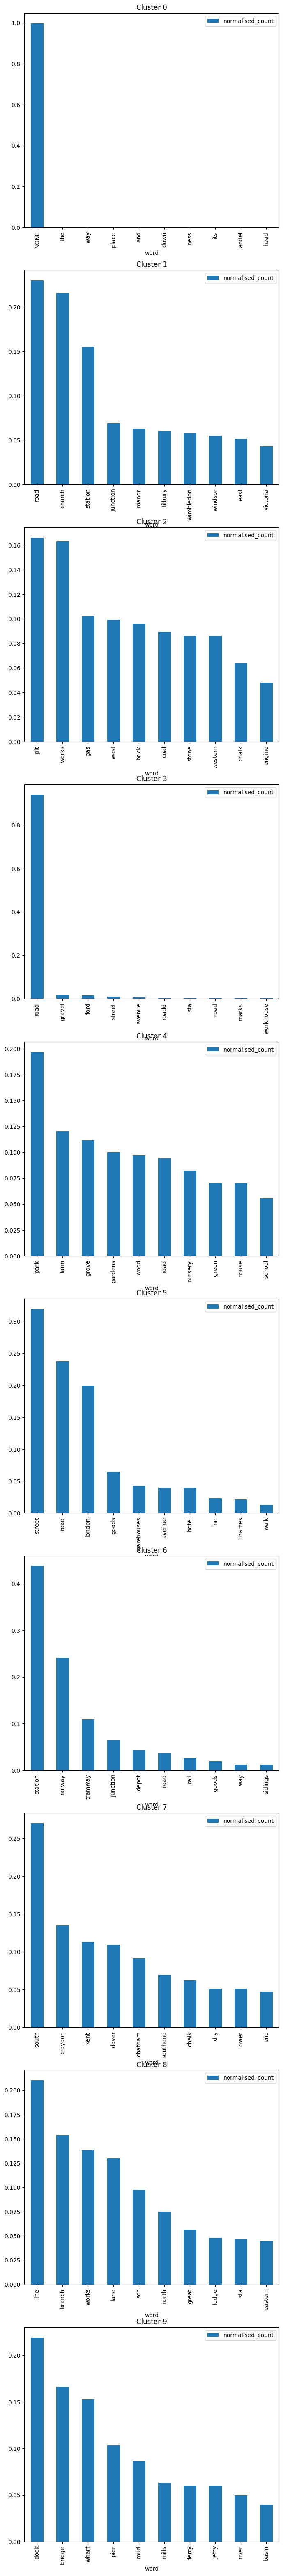

In [61]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=len(cluster_labels.index), ncols=1, figsize=(8, 8*len(cluster_labels.index)))

cluster_dataframes = {}

for cluster in cluster_labels.index:
	cluster_dataframes[cluster] = pd.DataFrame(Counter(cluster_labels.iloc[cluster]["words"]).most_common(10), columns=["word", "count"])
	cluster_dataframes[cluster]["normalised_count"] = cluster_dataframes[cluster]["count"]/cluster_dataframes[cluster]["count"].sum()
	cluster_dataframes[cluster].plot(kind='bar', x='word', y='normalised_count', title=f'Cluster {cluster}', legend=True, ax=ax[cluster])

fig.show()

In [41]:
patches_per_cluster = predictions_red['cluster'].value_counts()
print(patches_per_cluster)

cluster
0    21717
8     2398
1     1177
3      721
5      649
4      604
7      571
6      563
2      526
9      469
Name: count, dtype: int64


## 10b Cluster with patch + context text

### SKIP IF ALREADY RUN

In [42]:
# 10.1 Create 'sentences' of railspace labels in patches

# important this cell takes a while to run
# you can simply ignore and load the json file I've shared with you
tqdm.pandas()
near_text_context = [] 

for i,row in tqdm(predictions_red.iterrows(), total=predictions_red.shape[0]):
	# get context polygon
	minx, miny, maxx, maxy = row.geometry.bounds
	context_polygon = Polygon.from_bounds(minx-100, miny-100, maxx+100, maxy+100)
	# get text within a certain distance from the patch
	# get the set of text labels
	labels_patch_context = list(set(spotted_text_filtered[spotted_text_filtered.intersects(context_polygon)].text_cleaned.tolist()))
	# sort
	labels_patch_context = sorted(labels_patch_context)
	# add the labels as a list sorted alphabetically
	near_text_context.append(labels_patch_context)

with open('near_text_context.json', 'w') as out_txt:
	json.dump(near_text_context, out_txt)

100%|██████████| 29395/29395 [03:29<00:00, 140.51it/s]


In [24]:
# load the labels from json
with open('near_text_context.json', 'r') as in_txt:
    near_text_context = json.load(in_txt)

In [25]:
def filter_near_text(text):
	text = [w for w in text if len(w) > 2 and w.isalpha()]
	return text if len(text) > 0 else None

predictions_red["near_text_context"] = near_text_context

In [26]:
# 10.2 filter the list to remove short and non-alphabetic labels

# this is not ideal as it remove abbreviations and other useful information
# especially in the more denser urban areas, however we use it as a simple experiment
near_text_filtered_context = [' '.join([w for w in a if (len(w) > 2) and w.isalpha()]) for a in near_text_context]

In [27]:
# get the average number of words on a patch
np.mean([len(i) for i in near_text_filtered_context])

21.841367579520327

In [28]:
# 10.3 load the embedding model

model = SentenceTransformer('distilbert-base-nli-mean-tokens') # Livingwithmachines/bert_1760_1900 | distilbert-base-nli-mean-tokens
# encode the railspace "sentences", i.e. the list of alphabetically sorted labels

# Note to self: avoid 'sentence'. say set of (alphabetically sorted) spotted text on patch. 
# now, for each set of patchText, we examine how similar they are to each other and organise them into a (pre-determined) number of 'clusters' 
# e.g. a cluster is a group of sets of patchText that are most like each other

railspace_sentence_embeddings_context = model.encode(near_text_filtered_context)

In [29]:
railspace_sentence_embeddings_context.shape, predictions_red.shape

((29395, 768), (29395, 30))

In [30]:

# 10.4 fit the kmeans model to the railspace embeddings

# we choose a method of clustering as one approach among many to organise the data, to see patterns in the data
# this is connecting what we know about text and what we know about visual features on maps for the first time
# we can use the silhouette score to evaluate the quality of the clustering - best is 1, worst is -1

from sklearn.metrics import silhouette_score
cluster_data_context = {}

for n in tqdm(range(4, 11, 2)):
	cluster_data_context[n] = {}
	# fit the kmeans model
	kmeans = KMeans(n_clusters=n, random_state=0, n_init="auto", max_iter=1000).fit(railspace_sentence_embeddings_context)
	cluster_data_context[n]["kmeans"] = kmeans
	# get the silhouette score
	silhouette = silhouette_score(railspace_sentence_embeddings_context, kmeans.labels_, random_state=0)
	cluster_data_context[n]["silhouette"] = silhouette


  0%|          | 0/4 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 4/4 [01:12<00:00, 18.21s/it]


In [31]:
sorted_kmeans_context = pd.DataFrame(cluster_data_context).T.sort_values("silhouette", ascending=False)
sorted_kmeans_context.head()

,kmeans,silhouette
8,"KMeans(max_iter=1000, random_state=0)",0.17627
4,"KMeans(max_iter=1000, n_clusters=4, random_sta...",0.175253
10,"KMeans(max_iter=1000, n_clusters=10, random_st...",0.174646
6,"KMeans(max_iter=1000, n_clusters=6, random_sta...",0.174009


In [32]:
best_kmeans_context = sorted_kmeans_context.iloc[0]["kmeans"]

In [33]:
# add labels to the predictions_red dataframe

predictions_red['cluster_context'] = best_kmeans_context.labels_
predictions_red['near_text_filtered_context'] = near_text_filtered_context

In [45]:
patches_per_cluster = predictions_red['cluster_context'].value_counts()
print(patches_per_cluster)

cluster_context
7    5782
4    5145
1    4181
3    3616
2    3608
5    2438
0    2390
6    2235
Name: count, dtype: int64


In [ ]:
# 10.5 plot the different clusters on the map

predictions_red.explore(column='cluster_context', tiles=tiles, categorical=True, cmap="viridis", popup=['cluster_context', 'near_text_filtered_context']).save("clusters_context.html")
predictions_red.explore(column='cluster_context', tiles=tiles, categorical=True, cmap="viridis", popup=['cluster_context', 'near_text_filtered_context'])

In [35]:
import folium 

x, y = [i[0] for i in predictions_red.to_crs("EPSG:4326").unary_union.centroid.xy] # get bounds of the map

maps_context = []
for cluster in predictions_red["cluster_context"].unique():
	m = folium.Map(location=[y, x], zoom_start=9, tiles=tiles)
	predictions_red[predictions_red["cluster_context"] == cluster].explore(color="blue", marker_kwargs={"radius":1}, style_kwargs={"weight":1, "fillColor": "blue", "fillOpacity":1}, m=m)

	m.save(f"text_cluster_{cluster}_context.html")

	maps_context.append(m)

In [36]:
for cluster in predictions_red["cluster_context"].unique():
	# f = f"20sample_cluster_{cluster}_mean_pixel_RGB.csv"
	# cluster_df = predictions_red[predictions_red["cluster"] == cluster].sample(20, weights="mean_pixel_RGB", random_state=42)
	# cluster_df["image_id"].to_csv(f)
	
	cluster_df = predictions_red[predictions_red["cluster_context"] == cluster].copy(deep=True)
	cluster_df["mean_pixel"] = cluster_df["mean_pixel"].astype(float)
	cluster_df["polygon"] = cluster_df["polygon"].apply(to_wkt)
	cluster_df["centroid"] = cluster_df["centroid"].apply(to_wkt)
	cluster_df.to_file(f"cluster_{cluster}_context.geojson", driver="GeoJSON")

	with open(f"20sample_cluster_{cluster}_context_random.txt", "w") as f:
		f.writelines("\n".join(cluster_df["image_id"].sample(20, random_state=42).to_list()))

	with open(f"20sample_cluster_{cluster}_context_mean_pixel_RGB.txt", "w") as f:
		f.writelines("\n".join(cluster_df.sample(20, weights="mean_pixel", random_state=42)["image_id"].to_list()))

10.6 Understanding Clusters

The cells below contain different ways of looking at the clusters

In [37]:
#get labels for each cluster in predictions_red
cluster_labels_context = predictions_red.groupby('cluster_context')['near_text_filtered_context'].apply(list).reset_index()
cluster_labels_context

,cluster_context,near_text_filtered_context
0,0,"[cemetery union, field road, chap elm evelyn g..."
1,1,"[cour earks erhibition grounds, cour earks erh..."
2,2,"[king road, dryburgh egliston road, dryburgh r..."
3,3,"[beadon hammersmith king sta street west, bead..."
4,4,"[, , , , , ead, , , , , , line, , , , , , , , ..."
5,5,[floating fulham hurlingham pier wharf wharves...
6,6,[avon coal depot house lisgar more otto road t...
7,7,"[broadwway chan hamniersmith school west, broa..."


In [38]:
#count labels per cluster
cluster_labels_context['count'] = cluster_labels_context['near_text_filtered_context'].apply(lambda x: len(x))
cluster_labels_context

,cluster_context,near_text_filtered_context,count
0,0,"[cemetery union, field road, chap elm evelyn g...",2390
1,1,"[cour earks erhibition grounds, cour earks erh...",4181
2,2,"[king road, dryburgh egliston road, dryburgh r...",3608
3,3,"[beadon hammersmith king sta street west, bead...",3616
4,4,"[, , , , , ead, , , , , , line, , , , , , , , ...",5145
5,5,[floating fulham hurlingham pier wharf wharves...,2438
6,6,[avon coal depot house lisgar more otto road t...,2235
7,7,"[broadwway chan hamniersmith school west, broa...",5782


In [39]:
# count unique labels per cluster
cluster_labels_context['unique_count'] = cluster_labels_context['near_text_filtered_context'].apply(lambda x: len(set(x)))
cluster_labels_context

,cluster_context,near_text_filtered_context,count,unique_count
0,0,"[cemetery union, field road, chap elm evelyn g...",2390,1356
1,1,"[cour earks erhibition grounds, cour earks erh...",4181,1583
2,2,"[king road, dryburgh egliston road, dryburgh r...",3608,2383
3,3,"[beadon hammersmith king sta street west, bead...",3616,2075
4,4,"[, , , , , ead, , , , , , line, , , , , , , , ...",5145,25
5,5,[floating fulham hurlingham pier wharf wharves...,2438,1403
6,6,[avon coal depot house lisgar more otto road t...,2235,1485
7,7,"[broadwway chan hamniersmith school west, broa...",5782,4820


In [40]:
cluster_labels_context["count/unique_count"] = cluster_labels_context["count"]/cluster_labels_context["unique_count"]
cluster_labels_context["unique_count/count"] = cluster_labels_context["unique_count"]/cluster_labels_context["count"]
cluster_labels_context

,cluster_context,near_text_filtered_context,count,unique_count,count/unique_count,unique_count/count
0,0,"[cemetery union, field road, chap elm evelyn g...",2390,1356,1.762537,0.567364
1,1,"[cour earks erhibition grounds, cour earks erh...",4181,1583,2.641188,0.378618
2,2,"[king road, dryburgh egliston road, dryburgh r...",3608,2383,1.514058,0.660477
3,3,"[beadon hammersmith king sta street west, bead...",3616,2075,1.742651,0.573838
4,4,"[, , , , , ead, , , , , , line, , , , , , , , ...",5145,25,205.800000,0.004859
5,5,[floating fulham hurlingham pier wharf wharves...,2438,1403,1.737705,0.575472
6,6,[avon coal depot house lisgar more otto road t...,2235,1485,1.505051,0.664430
7,7,"[broadwway chan hamniersmith school west, broa...",5782,4820,1.199585,0.833622


In [41]:
cluster_labels_context["near_text_filtered_context_NONE"] = cluster_labels_context["near_text_filtered_context"].apply(lambda x: [word if len(word) else "NONE" for word in x])
cluster_labels_context["words"] = cluster_labels_context["near_text_filtered_context_NONE"].apply(lambda x: " ".join(x).split())
cluster_labels_context

,cluster_context,near_text_filtered_context,count,unique_count,count/unique_count,unique_count/count,near_text_filtered_context_NONE,words
0,0,"[cemetery union, field road, chap elm evelyn g...",2390,1356,1.762537,0.567364,"[cemetery union, field road, chap elm evelyn g...","[cemetery, union, field, road, chap, elm, evel..."
1,1,"[cour earks erhibition grounds, cour earks erh...",4181,1583,2.641188,0.378618,"[cour earks erhibition grounds, cour earks erh...","[cour, earks, erhibition, grounds, cour, earks..."
2,2,"[king road, dryburgh egliston road, dryburgh r...",3608,2383,1.514058,0.660477,"[king road, dryburgh egliston road, dryburgh r...","[king, road, dryburgh, egliston, road, dryburg..."
3,3,"[beadon hammersmith king sta street west, bead...",3616,2075,1.742651,0.573838,"[beadon hammersmith king sta street west, bead...","[beadon, hammersmith, king, sta, street, west,..."
4,4,"[, , , , , ead, , , , , , line, , , , , , , , ...",5145,25,205.800000,0.004859,"[NONE, NONE, NONE, NONE, NONE, ead, NONE, NONE...","[NONE, NONE, NONE, NONE, NONE, ead, NONE, NONE..."
5,5,[floating fulham hurlingham pier wharf wharves...,2438,1403,1.737705,0.575472,[floating fulham hurlingham pier wharf wharves...,"[floating, fulham, hurlingham, pier, wharf, wh..."
6,6,[avon coal depot house lisgar more otto road t...,2235,1485,1.505051,0.664430,[avon coal depot house lisgar more otto road t...,"[avon, coal, depot, house, lisgar, more, otto,..."
7,7,"[broadwway chan hamniersmith school west, broa...",5782,4820,1.199585,0.833622,"[broadwway chan hamniersmith school west, broa...","[broadwway, chan, hamniersmith, school, west, ..."


/var/folders/fn/j7v8jkl1717c1b6sy_sr0szc0000gr/T/ipykernel_97997/1570630112.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


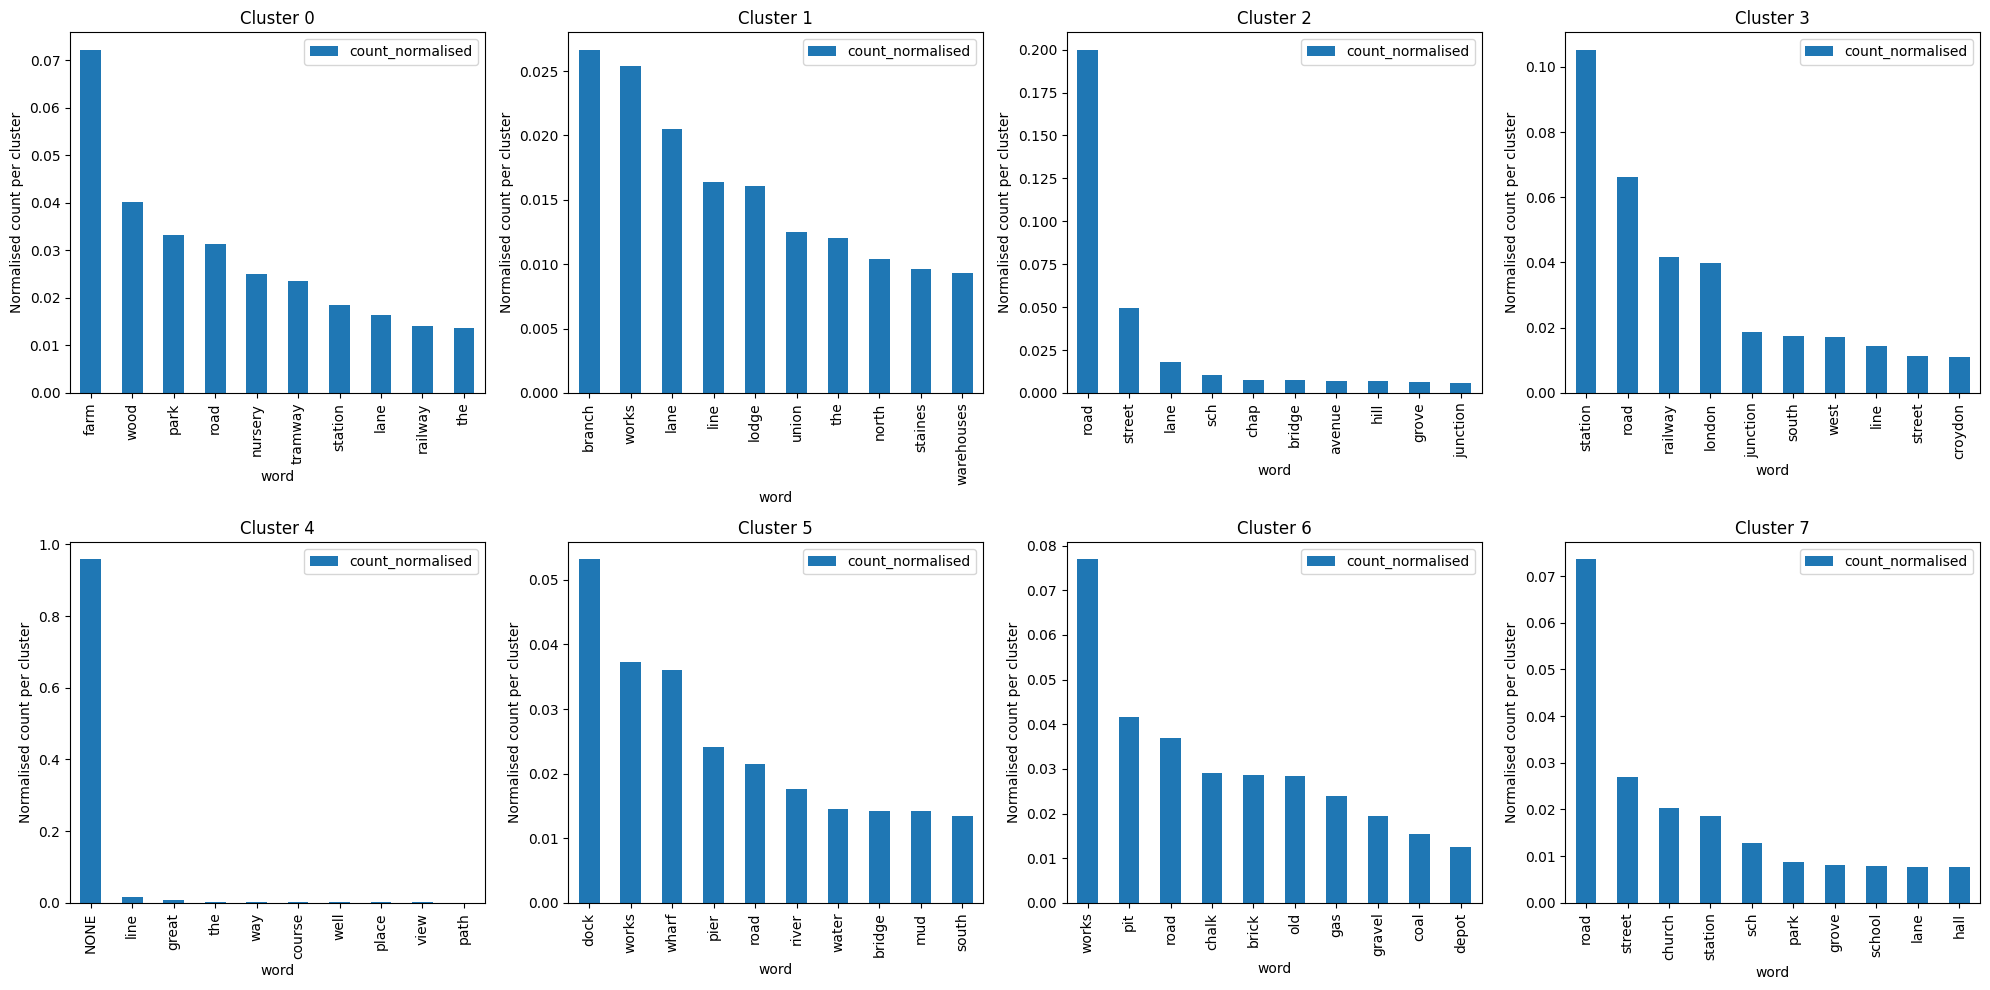

In [46]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

cluster_dataframes = {}

for cluster in cluster_labels_context.index:
	i, j = divmod(cluster, 4)

	counts = Counter(cluster_labels_context.iloc[cluster]["words"])
	df = pd.DataFrame.from_dict(counts, orient="index", columns=["count"]).reset_index(names=["word"])
	df["count_normalised"] = df["count"] / df["count"].sum()
	df.sort_values("count_normalised", ascending=False, inplace=True)
	df[:10].plot(kind='bar', x='word', y='count_normalised', title=f'Cluster {cluster}', legend=True, ax=ax[i, j], ylabel="Normalised count per cluster")
	cluster_dataframes[cluster] = df

fig.tight_layout()
fig.savefig("word_counts_context.jpg", dpi=400, format="jpg")
fig.show()

In [43]:
all_words = [word for words in cluster_labels_context["words"].tolist() for word in words]
all_words_count = Counter(all_words)

/var/folders/fn/j7v8jkl1717c1b6sy_sr0szc0000gr/T/ipykernel_97997/1750916536.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


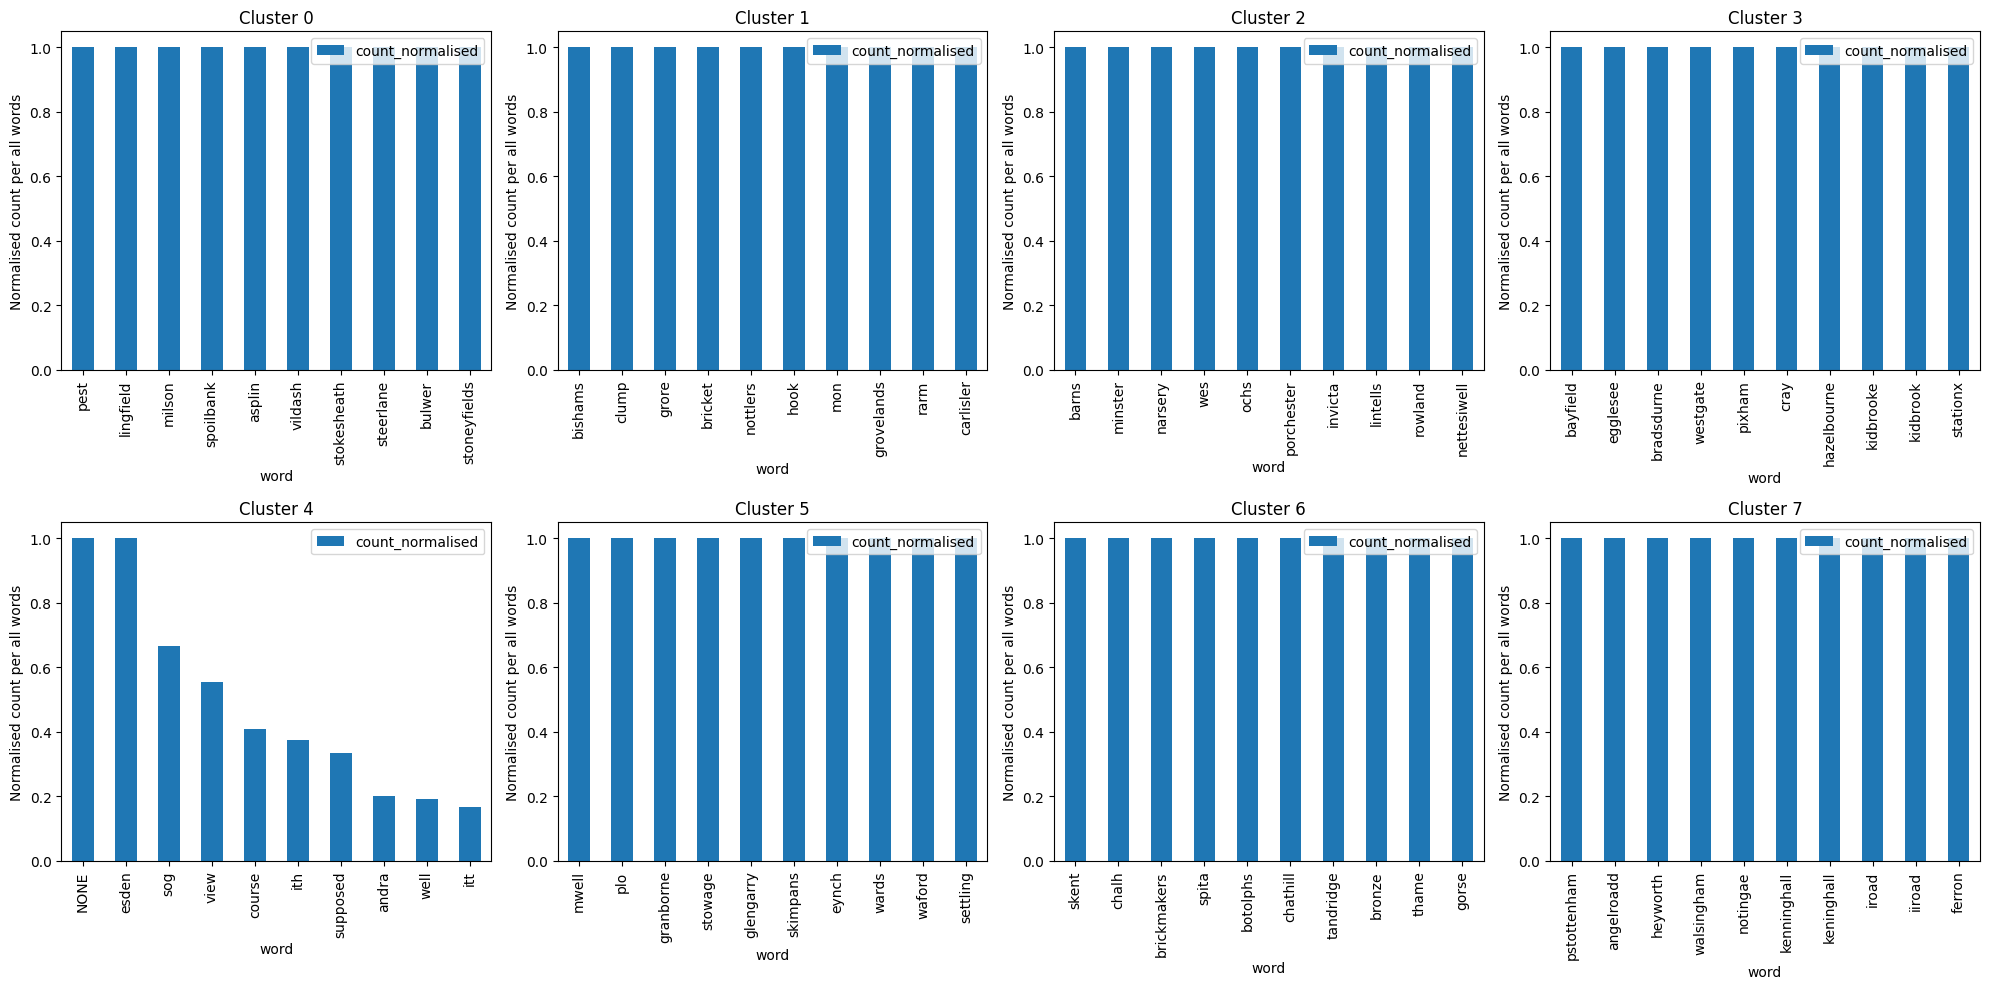

In [44]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

cluster_dataframes = {}

for cluster in cluster_labels_context.index:
	i, j = divmod(cluster, 4)
	
	counts = Counter(cluster_labels_context.iloc[cluster]["words"])
	df = pd.DataFrame.from_dict(counts, orient="index", columns=["count"]).reset_index(names=["word"])
	df["count_normalised"] = df.apply(lambda row: row["count"] / all_words_count.get(row["word"]), axis=1)
	df.sort_values("count_normalised", ascending=False, inplace=True)
	df[:10].plot(kind='bar', x='word', y='count_normalised', title=f'Cluster {cluster}', legend=True, ax=ax[i, j], ylabel="Normalised count per all words")
	cluster_dataframes[cluster] = df

fig.tight_layout()
fig.show()

# Fin.